In [1]:
import pandas as pd
import numpy as np



\begin{align*}
H_0 &= \text {No hay diferencia entre consumo con aditivo y sin aditivo} \\
H_1 &= \text {Si hay diferencia entre consumo con aditivo y sin aditivo}
\end{align*}

In [2]:
df=pd.read_csv("4.3.17.26.csv")
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Con_aditivo,34.7,28.3,19.6,25.1,15.7,24.5,28.7,23.5,27.7,32.1,29.6,22.4,25.7,28.1,24.3
Sin_aditivo,31.4,27.2,20.4,24.6,14.9,22.3,26.8,24.1,26.2,31.4,28.8,23.1,24.0,27.3,22.9


In [3]:
lista=[]
for i in df.columns:
    dif = np.round(df.loc["Con_aditivo",i]-df.loc["Sin_aditivo",i],4)
    if dif > 0:
        lista.append(1)
    else:
        lista.append(0)

# Obtenemos el número de vecesx que con_aditivo fue mayor a sin_aditivo

In [4]:
sum(lista)

12

# Distribución binomial de X caras ( cara de una moneda $p=0.5$) es 
Un experimento de Bernoulli puede tener como resultado un éxito con probabilidad $p$ y un fracaso con probabilidad $q=1-p$. Entonces, la distribución de probabilidad de la variable aleatoria binomial $X$, el número de éxitos en $n$ ensayos independientes, es

\begin{align*} 
b(x; n,p)&= \binom{n}{x}  p^xq^{n-x} \\
&=\frac{n!}{x!(n-x)!}p^xq^{n-x} 
\end{align*}

Probemos para el caso en que tenemos

\begin{align*}
n &= 15\\
p &= 0.5\\
x &= 3
\end{align*}

Sustituyendo los valores obtenemos:

\begin{align*} 
b(x; n,p)&= \binom{n}{x}  p^xq^{n-x} \\
&=\frac{n!}{x!(n-x)!}p^xq^{n-x} = 0.0032
\end{align*}

para este caso particular

In [5]:
import math

def b(x,n,p):
    return ((math.factorial(n))/(math.factorial(x)*math.factorial(n-x)))*(p**x)*((1-p)**(n-x))
    

In [6]:
b(13,15,0.5)

0.003204345703125

Definimos la función b(x,n,p), que nos ayuda a encontrar la probabilidad de que hayamos obtenido un cierto valor. Como queremos encontrar ( a un nivel de significancia del 5%) que el valor obtenido no caiga dentro del valor crítico donde podemos rechazar la hipótesis nula. Debemos calcular el área a la derecha de $X = 13$ y multiplicarla por 2 (ambas colas), con lo que obtenemos

In [7]:
for index in range(12,16):
    print(index)
area_cola_derecha = 0
n = 15
p = 0.5
for index in range(12,16):
    area_cola_derecha += b(index,n,p)
2*area_cola_derecha

12
13
14
15


0.03515625

Como el área obtenida es menor de 0.05. Se rechaza la hipótesis nula a un nivel de significancia del 0.05. Sin embargo el área obtenida es mayor a 0.01 por lo que no se puede rechazar la hipótesis nula a un nivel de significancia de 0.01

Si X es una variable aleatoria binomial con media $\mu=np$ y varianza $\sigma^2 =npq$, entonces la forma limitatnte de la distribución de 

$$Z = \frac{X -np}{\sqrt{npq}}$$

Conforme n $\rightarrow \infty$, es la distribucón normal estandar

In [8]:
Z = ((12-0.5)-(15*.5))/(15*.5*.5)**.5
Z

2.065591117977289

### Haciendo esta aproximación obtuvimos el valor de z, con lo que por medio de la función de distribución acumulativa podemos obtener el área de probabiliad a la izquierda de z = 2.06 P(X <= x) . (Nuevamente multiplicamos por 2)


In [9]:
import statistics
z = statistics.NormalDist().cdf(2.065591117977289)
(1-z)*2

0.038867103812417314

Obtenemos las mismas concluciones, donde rechazamos la hipótesis nula a un nivel de significancia del 5%, y no la rechazamos a un nivel del 1%

Gráficamente

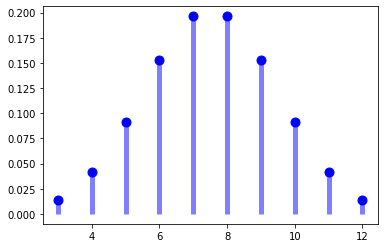

In [10]:
import matplotlib.pyplot as plt
import scipy.stats 
fig, ax = plt.subplots(1, 1)
n, p = 15, 0.5
mean, var, skew, kurt = scipy.stats.binom.stats(n, p, moments='mvsk')
x = np.arange(scipy.stats.binom.ppf(0.005, n, p),
              scipy.stats.binom.ppf(1-0.0025, n, p))
ax.plot(x, scipy.stats.binom.pmf(x, n, p), 'bo', ms=9, label='binom pmf')
ax.vlines(x, 0, scipy.stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = scipy.stats.binom(n, p)

plt.show()

# 17.34

In [11]:
import pandas as pd
df=pd.read_csv("4.3.17.34.csv")
df

,A,B
0,88.0,72
1,75.0,65
2,92.0,84
3,71.0,53
4,63.0,76
5,84.0,80
6,55.0,51
7,64.0,60
8,82.0,57
9,96.0,85


In [12]:
df2=pd.melt(df.reset_index(), id_vars=["index"], value_vars=["A","B"] ).dropna(
    axis=0
).sort_values(by="value").reset_index(drop=True)
df2["index"]=df2.index+1
df2


,index,variable,value
0,1,B,51.0
1,2,B,53.0
2,3,A,55.0
3,4,B,57.0
4,5,B,60.0
5,6,B,61.0
6,7,A,63.0
7,8,A,64.0
8,9,B,65.0
9,10,A,71.0


Los siguientes dos bloques presentan código que asume que solo existe n números repetidos consecutivos. Habría que invertir más tiempo por si existen números repetidos al principio y al final 

In [13]:
def check_repeated(df):
    repeated=set()
    for i in range(0,len(df)-1):
        if df.loc[df.index[i],"value"]==df.loc[df.index[i+1],"value"]:
            repeated.update([df.loc[df.index[i],"index"],df.loc[df.index[i],"index"]+1])
    return repeated
    

In [14]:
repeated = check_repeated(df2)
#repeated = [x+1 for x in repeated]
tamaño = len(repeated) 
mean = (sum(repeated))/tamaño
print("rep", repeated,"tam",tamaño,"mean",mean)
for element in repeated:
    df2.loc[df2.index[element-1],"index"]=mean
df2.head()

rep {17, 18} tam 2 mean 17.5


,index,variable,value
0,1.0,B,51.0
1,2.0,B,53.0
2,3.0,A,55.0
3,4.0,B,57.0
4,5.0,B,60.0


In [15]:
R1=df2[df2["variable"]=="A"]["index"].sum()
R1

141.5

In [16]:
R2=df2[df2["variable"]=="B"]["index"].sum()
R2

158.5

In [17]:
N1=len(df2[df2["variable"]=="A"]["value"])
N1

10

In [18]:
N2=len(df2[df2["variable"]=="B"]["value"])
N2

14

$$ U = N_1 N_2 + \frac{N_1(N_1 +1)}{2}-R_1$$  

In [19]:
U=10*14 + ((N1*(N1+1))/2)-R1 
U

53.5

$$\mu_U=\frac{N_1N_2}{2}$$

$$\sigma_u^2=\frac{N_1N_2(N_1 + N_2 +1)}{12}$$

In [20]:
mu= N1*N2/2
mu

70.0

In [21]:
sigma2=(N1*N2*(N1+N2+1))/12
sigma2

291.6666666666667

Con lo anterior podemos obtener

$$z = \frac{U - \mu_u}{ \sigma_u } = -0.966$$

In [22]:
(U - mu)/(sigma2)**.5

-0.9661410722190478

La regla al nivel de significancia del 0.05 es:

\begin{align}
&\text{Aceptar }H_0\text{ si } -1.96 \leq z \leq 1.96 \\
&\text{Rechazar si no es así }
\end{align}

Por lo que aceptamos $H_0$ 

Otra forma de verlo es utilizando la función de distribucion cumulativa que nos da el área bajo la curva (probabilidad acumulada) a la izquierda de $z = -0.966$ de una normal. Como tenemos dos colas, multiplicamos z por 2

In [23]:
import statistics
z = statistics.NormalDist().cdf(-0.966)
z*2

0.33404418103523714

Como el valor obtenido es mayor a 0.05, aceptamos $H_0$

# 17.49   


\begin{align*}
H_0 &= \text {No hay diferencia entre los rendimientos} \\
H_1 &= \text {Si hay diferencia}
\end{align*}

In [24]:
df3=pd.read_csv("4.3.17.49.csv")

In [25]:
df3=pd.melt(df3.reset_index(), id_vars=["index"] ).dropna(
    axis=0
).sort_values(by="value").reset_index(drop=True)
df3["index"]=df3.index+1
df3


,index,variable,value
0,1,A,12
1,2,B,12
2,3,D,12
3,4,E,14
4,5,B,14
5,6,C,14
6,7,A,15
7,8,B,15
8,9,D,15
9,10,C,16


In [26]:
print(check_repeated(df3))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18}


In [27]:
def reindex_based_on_average(
    df: pd.DataFrame, value_column: str = "value", index_column: str = "index"
):
    """ Detecta valores repetidos en la columna index_colum y cambia el índice de la columna index_column
        promediando los índices con valores repetidos
    
    args: 
        df(pd.DataFrame) : Dataframe con los valores ordenados de menor a mayor indicado por la columna index
        
        value_column: La columna en la que se quiere descubrir valores repeditos
        
        index_column: La columna en la que se quiere reindexar con base en valores repetidos que serán sustituidos
                      el promedio de los índices
                      
    Nota: Deben estar ordenados comenzando con 1 (el valor más pequeño), 2 el siguiente (o igual), etc.
    """
    mapeo = {}
    conteo = {}
    df_int = df.copy()
    for ind in check_repeated(df_int):
        if ind >= len(df_int[value_column]):
            break

        if (
            df_int.loc[df_int.index[ind - 1], value_column]
            == df_int.loc[df_int.index[ind], value_column]
        ):
            if df_int.loc[df_int.index[ind], value_column] not in [
                x for i in mapeo.values() for x in i
            ]:
                mapeo[ind] = {
                    df_int.loc[df.index[ind - 1], value_column],
                    df_int.loc[df_int.index[ind], value_column],
                }
                conteo[ind] = 2
            else:
                for key in mapeo.keys():
                    if (
                        list(mapeo[key])[0]
                        == df_int.loc[df_int.index[ind - 1], value_column]
                    ):
                        conteo[key] = conteo[key] + 1
    for key in mapeo.keys():
        for int_index in range(key, key + conteo[key]):
            df_int.loc[df_int.index[int_index - 1], index_column] = (
                sum([x for x in range(key, key + conteo[key])]) / conteo[key]
            )
    return df_int


In [28]:
reindexado=reindex_based_on_average(df3)

In [29]:
reindexado

,index,variable,value
0,2.0,A,12
1,2.0,B,12
2,2.0,D,12
3,5.0,E,14
4,5.0,B,14
5,5.0,C,14
6,8.0,A,15
7,8.0,B,15
8,8.0,D,15
9,10.0,C,16


In [30]:
def obtain_r1_n1(df,column):
    r1s=[]
    n1s=[]
    for element in column:
        r1s.append(df[df["variable"]==element]["index"].sum())
        n1s.append(len(df[df["variable"]==element]["value"]))
    return r1s,n1s

In [31]:
r1_list,n1_list=obtain_r1_n1(reindexado,["A","B","C","D","E"])

$$H = \frac{12}{N(N+1)}\sum_{j=1}^{k}\frac{R_j^2}{N_j}-3(N+1)$$

In [32]:
suma=0
for x in range(0,len(r1_list)):
    suma+=r1_list[x]**2/(n1_list[x])
suma

2295.5

In [33]:
N=sum(n1_list)

In [34]:
H=(12/(N*(N+1)))*(suma)-3*(N +1)
H

2.585714285714289

Como k-1 = 3 grados de libertad $\chi_{0.95}^2 = 7.815$  y  $\chi_{0.99}^2 = 11.345$. Como 

$$2.585 < \chi_{0.95}^2 < \chi_{0.99}^2$$

No se puede rechazar la hipótesis de que haya diferencia

# 17.55 En cada una de estas secuencias, determinar la cantidad, V, de rachas


In [35]:
df4=pd.read_csv("4.3.17.55.csv")
a=df4[['a']]
b=df4[['b']]
a=a.dropna()
df4

,a,b
0,A,H
1,B,H
2,A,T
3,B,H
4,B,H
5,A,H
6,A,T
7,A,T
8,B,T
9,B,T


In [36]:

def contar_rachas(df:pd.DataFrame, column:str ):
    rachas=1
    for i in range(len(df)):
        for j in range(i+1,len(df)):
            if df.loc[df.index[i],column]==df.loc[df.index[j],column] and j > i:
                break
            elif df.loc[df.index[i],column]!=df.loc[df.index[j],column]:
                rachas+=1
                break
    return rachas


In [42]:
V_a=contar_rachas(a,"a")
print(V_a)
N1_a=len(a.loc[a["a"]=="A"])
print(N1_a)
N2_a=len(a.loc[a["a"]=="B"])
print(N2_a)
print(len(a))

8
6
6
12


In [43]:
V_b=contar_rachas(b,"b")
print(V_b)
N1_b=len(b.loc[b["b"]=="H"])
print(N1_b)
N2_b=len(b.loc[b["b"]=="T"])
print(N2_b)
print(len(b))

10
10
8
18


La cantidad de rachas es:

$$a) 8 \text{ rachas}$$

$$b) 10 \text{ rachas}$$

Extra. Para el inciso a

$$\mu_V=\frac{2 N_1 N_2}{N_1+N_2} + 1$$ 

$$\sigma_V^2=\frac{2N_1 N_2 (2N_1 N_2-N_1-N_2)}{(N_1+N_2)^2(N_1+N_2-1)}$$ 

$$z = \frac{V -\mu_V}{\sigma_V}$$

In [47]:
mu_a= ((2*N1_a*N2_a)/(N1_a+N2_a))+1
mu_a

7.0

In [53]:
sigma_a=(2*N1_a*N2_a*(2*N1_a*N2_a-N1_a-N2_a))/((N1_a+N2_a)**2*(N1_a+N2_a-1))
sigma_a

2.727272727272727

In [54]:
z = (V_a-mu_a)/(sigma_a**.5)
z

0.6055300708194983

Empleando una prueba de dos colas, si $-1.96 \leq z \leq 1.96$ a un nivel de significancia 0.05, como cae dentro, se concluye que la muestra es aleatoria 

# 17.62



Intuitivamente se me ocurre ordenar de mayor a menor para tratar de encontrar rachas

In [122]:
df5=pd.read_csv("4.3.17.62.csv")

In [124]:
df5.describe()

,calificaciones
count,40.000000
mean,69.000000
std,13.698212
min,40.000000
25%,60.750000
50%,70.000000
75%,78.000000
max,95.000000


In [125]:
median=df5.describe().loc["50%"][0]

In [126]:
def relabel_df(df:pd.DataFrame,value:float,column:str):
    for i in range(len(df)):
        dif=df.loc[df.index[i],column]-value
        if dif > 0:
            df.loc[df.index[i],"diff"]="+"
        elif dif < 0:
            df.loc[df.index[i],"diff"]="-"
        else:
            df.loc[df.index[i],"diff"]=np.nan

In [135]:
relabel_df(df5,median,"calificaciones")
mapped=df5.dropna()
mapped

,calificaciones,diff
0,71,+
1,67,-
2,55,-
3,64,-
4,82,+
5,66,-
6,74,+
7,58,-
8,79,+
9,61,-


In [138]:
V_a=contar_rachas(mapped,"diff")
print(V_a)
N1_a=len(mapped.loc[mapped["diff"]=="+"])
print(N1_a)
N2_a=len(mapped.loc[mapped["diff"]=="-"])
print(N2_a)
print(N1_a+N2_a)

26
18
19
37


In [132]:
mu_a= ((2*N1_a*N2_a)/(N1_a+N2_a))+1
mu_a

19.486486486486488

In [133]:
sigma_a=(2*N1_a*N2_a*(2*N1_a*N2_a-N1_a-N2_a))/((N1_a+N2_a)**2*(N1_a+N2_a-1))
sigma_a

8.97954711468225

$$\mu_V=\frac{2 N_1 N_2}{N_1+N_2} + 1$$ 

$$\sigma_V^2=\frac{2N_1 N_2 (2N_1 N_2-N_1-N_2)}{(N_1+N_2)^2(N_1+N_2-1)}$$ 

$$z = \frac{V -\mu_V}{\sigma_V}$$

In [134]:
z = (V_a-mu_a)/(sigma_a**.5)
z

2.173642423710653

Empleando una prueba de dos colas, si $-1.96 \leq z \leq 1.96$ a un nivel de significancia 0.05, como no cae dentro, se concluye que la muestra no es aleatoria a un nivel de significancia de 0.05_ 